## Bonus: OpenAPC


### Step 1: load packages

* **readr** for reading tabular data
* **dplyr** for data manipulation
* **ggplot2** for data visualization

If necessary, install the packages before loading them.

In [2]:
#install.packages("readr")
#install.packages("dplyr")
#install.packages("ggplot2")
library(readr)
library(dplyr)
library(ggplot2)

Installing package into 'C:/Users/dorotheastrecker/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dorotheastrecker\AppData\Local\Temp\RtmpgpcNnR\downloaded_packages


Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.1.0"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.1.0"
Warning message:
"package 'forcats' was built under R version 4.1.1"


### Step 2: loading the data from GitHub

To download data from GitHub, we pass the URL (of the "raw" data) to the function *read_csv*. We store the results in *DF* and inspect the structure of the data frame.

Next, we filter rows where *institution* hast the value "HU Belrin" and store the results in *HU_data*.

**Question:**
What information does the data set provide?
* The OpenAPC provides information on fees paid for Open Access journal articles. Each row corresponds to an article. Information on the institution paying the fee, the year the fee was paid, the amount paid (in EUR), the journal the article is published in etc. is included.

In [5]:
DF <- read_csv("https://raw.githubusercontent.com/OpenAPC/openapc-de/master/data/apc_de.csv")

Rows: 137444 Columns: 18

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (12): institution, doi, publisher, journal_full_title, issn, issn_print,...
dbl  (3): period, euro, pmid
lgl  (3): is_hybrid, indexed_in_crossref, doaj


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [6]:
# inspect the structure
str(DF)

spec_tbl_df [137,444 x 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ institution        : chr [1:137444] "Bamberg U" "Bamberg U" "Bamberg U" "Bamberg U" ...
 $ period             : num [1:137444] 2013 2013 2013 2013 2013 ...
 $ euro               : num [1:137444] 1372 960 960 960 182 ...
 $ doi                : chr [1:137444] "10.2147/jpr.s45097" "10.3389/fpsyg.2013.00318" "10.3389/fpsyg.2013.00406" "10.3389/fpsyg.2013.00453" ...
 $ is_hybrid          : logi [1:137444] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ publisher          : chr [1:137444] "Dove Medical Press Ltd." "Frontiers Media SA" "Frontiers Media SA" "Frontiers Media SA" ...
 $ journal_full_title : chr [1:137444] "Journal of Pain Research" "Frontiers in Psychology" "Frontiers in Psychology" "Frontiers in Psychology" ...
 $ issn               : chr [1:137444] "1178-7090" "1664-1078" "1664-1078" "1664-1078" ...
 $ issn_print         : chr [1:137444] NA NA NA NA ...
 $ issn_electronic    : chr [1:137444] "1178-7090" "1664-10

In [12]:
# filter for HU Berlin
HU_data <- filter(DF, institution == "HU Berlin")

### Step 3: inspecting the data

**Question:** Use *table* to look at frequency distribution tables of *period* and *publisher*. What years does the data set cover? What publishers are mentioned most?
* The data set covers the years 2018 - 2021.
* The publisher mentioned most is Informa UK Limited.

In [13]:
# frequency distribution of the columns publication_year and resource_type
table(HU_data$period)
table(HU_data$publisher)


2018 2019 2020 
  46   94  124 


                            American Physical Society (APS) 
                                                          2 
                          American Society for Microbiology 
                                                          1 
Association for Research in Vision and Ophthalmology (ARVO) 
                                                          2 
                                              Beltz Juventa 
                                                          1 
                                            Copernicus GmbH 
                                                          3 
                           eLife Sciences Publications, Ltd 
                                                          1 
                                                Elsevier BV 
                                                          7 
                                         Frontiers Media SA 
                                                         58 
                       


FALSE  TRUE 
  159   105 

### Step 4: analyse the results

The function *summary* is an easy way to get summary statistics of a numerical variable: it returns the minimum and maximum values, median, mean and the 1st and 3rd quartile.

**Question:** Use *summary* to look at summary statistics of *euro*. What do you notice about the distribution of fees?
* The fees range from 265.2 to 3962.7 EUR.
* On average, 1280.7 EUR were paid per article.

In [14]:
# get summary statistics of euro
summary(HU_data$euro)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  265.2   712.5  1148.6  1280.7  1882.9  3962.7 

A great way of exploring distributions visually are Histograms. Below, we use the *ggplot2* geometry *geom_histogram*, and set the number of bins to 50.

**Question:** Look at the histogram of *euro*. What do you notice about the distribution of fees?
* There is a bimodal distribution, with the two peaks at approximately 700 and 2000 EUR, and only few values above that.

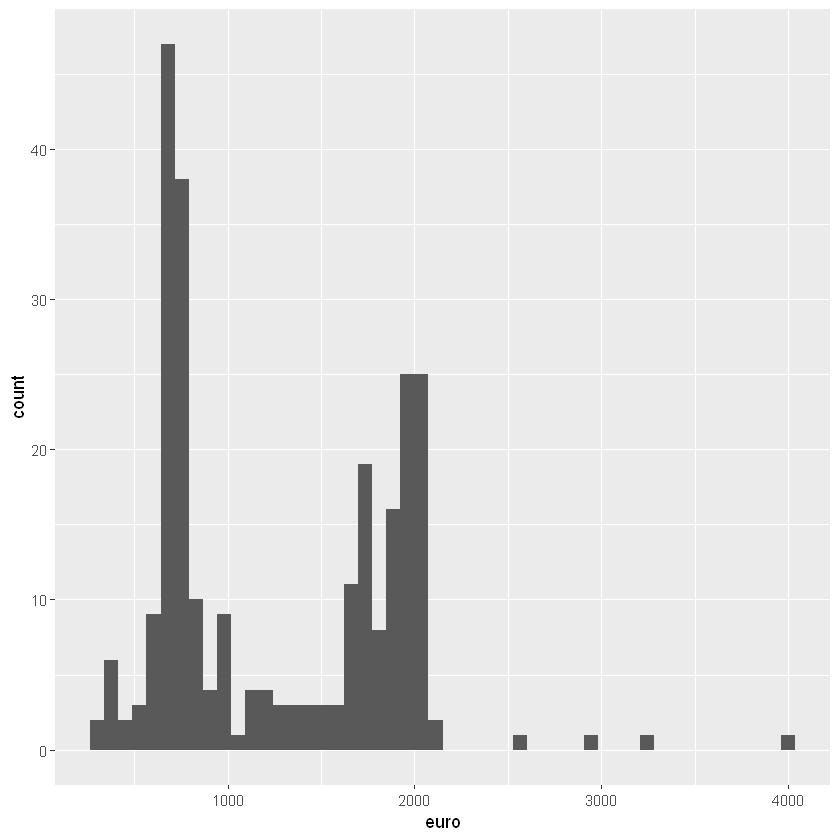

In [21]:
# histogram of euro
ggplot(HU_data, aes(x = euro)) +
    geom_histogram(bins = 50)

We can also calculate summary statistics for groups within the data. Below, we first group the data by *period*. Then, we pass the results to *summarise*, a *dplyr* funtion that lets you summarise all observations in a group by a function you choose. Here, we use the funtions *mean*, *min* and *max*.

**Question:** Look at the grouped summary statistics of *euro*. What do you notice?
* The mean and maximum fees have increased continually from 2018 - 2020.

In [29]:
# get summary statistics of euro by period
HU_data %>%
    group_by(period) %>%
    summarise(mean = mean(euro),
             min = min(euro),
             max = max(euro))

period,mean,min,max
<dbl>,<dbl>,<dbl>,<dbl>
2018,1182.004,400.00,2060.65
2019,1254.582,265.24,3272.50
2020,1337.011,400.00,3962.70


Another approach to visualizing distributions are Histograms. Below, we create a boxplot of *euro* by *period*. We layer the *ggplot2* geometries *geom_boxplot* and *geom_point* (with *position* set to *jitter* to avoid overlapping points).

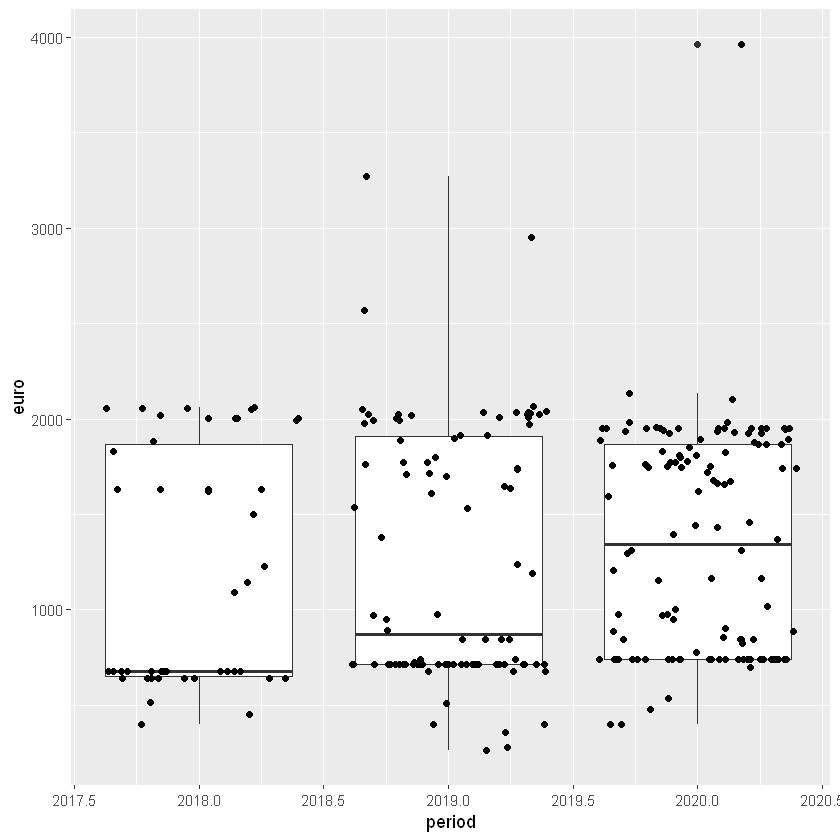

In [28]:
# boxplot of euro by period
ggplot(HU_data, aes(x = period, y = euro, group = period)) +
    geom_boxplot() +
    geom_point(position = "jitter")